##**Task2:-Prediction using Unsupervised ML**

###**Author:- Harsh Bhatia**
Task is to predict the optimum number of clusters from the given ‘Iris’ dataset 
and represent it visually 

Link to dataset:-: https://bit.ly/3kXTdox

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
#importing iris dataset 
from google.colab import files
uploaded = files.upload()

#read data from link 
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

#displaying first 5 rows of the dataset
df.head()

Saving Iris.csv to Iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##**Pre-processing the dataset**

In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

We can see that in iris data set , there is data for 3 species with 50 entries for each

In [ ]:
#displaying the number of rows and columns in the dataset
df.shape

(150, 6)

In [ ]:
#to display the datatype of each column and to check presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Obsevation:- Since the number of not null rows is the same as the total number of rows in the dataset so there are no null values and the datatypes are appropriate for analysis on attributes

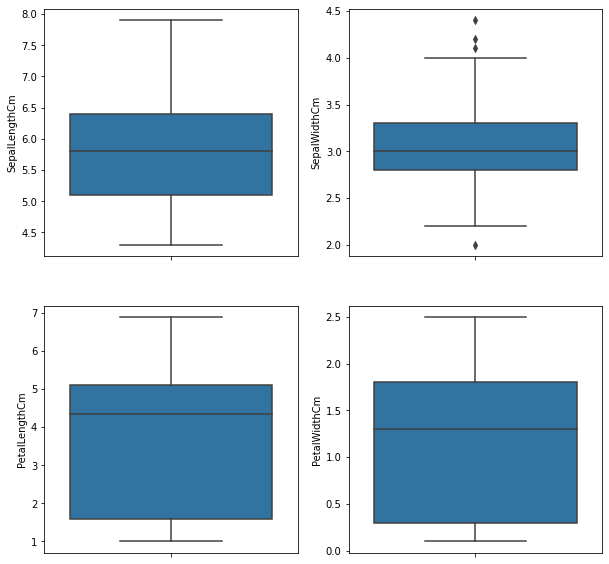

In [ ]:
#Checking the presence of outliers using boxplot
cols=df.columns[1:5] #creaitng array of the columns
position=1
plt.figure(figsize=(10,10))
for i in cols:
  plt.subplot(2,2,position)
  position+=1
  sns.boxplot(y=df[i])

Observation:- From the boxplots we can see that there are outliers in the column sepal width  

In [ ]:
#removing the outliers from sepal width column
#value at 25% percentile
q1=df['SepalWidthCm'].quantile(0.25) 
#value at 75% percentile
q3=df['SepalWidthCm'].quantile(0.75) 
#iqr is interquantile range . It is the spread of middle 50% of the data values
iqr= q3-q1 
df=df[(df['SepalWidthCm']>=q1-1.5*iqr) & (df['SepalWidthCm']<=q3+1.5*iqr)]
df.shape


(146, 6)

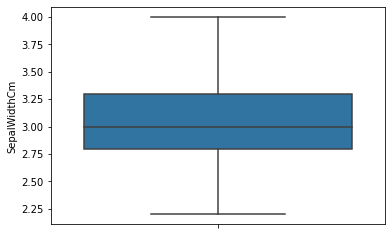

In [ ]:
#verifying that that there are no outliers in sepal width 
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

Observation:- 
* We can see that after removing the outliers the number of rows are reduced from 150 to 146 
* No outliers are visible in the boxplot

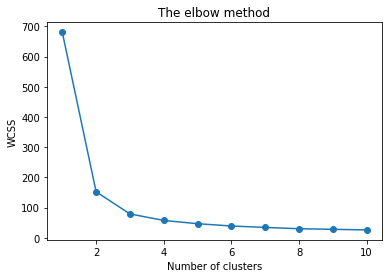

In [ ]:
# Finding the optimum number of clusters for k-means 

x = df.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
wcss = []

#determining wcss for different number of clusters(k) 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia_ is the SSE

# Plotting the results onto a line graph, to observe 'The elbow'
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

According to elbow method the optimum number of clusters is at the point twhere the elbow occurs , so according to the above graph the optimum number of clusters is 3.

Elbow is the point at which the WCSS(within-cluster sum of squares) doesn't reduce significantly with each iteration

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
#fit_predict() :- Computes cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(x)


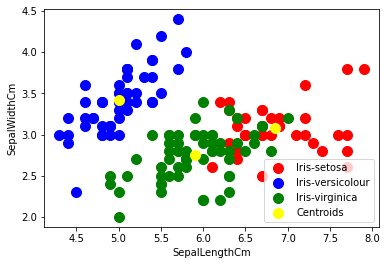

In [ ]:
# Visualising the clusters - On the first two columns, 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa',)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel(cols[0]);
plt.ylabel(cols[1])
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

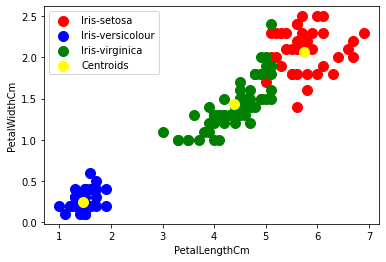

In [ ]:
# Visualising the clusters - On the 3rd and 4th  columns
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel(cols[2]);
plt.ylabel(cols[3])
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

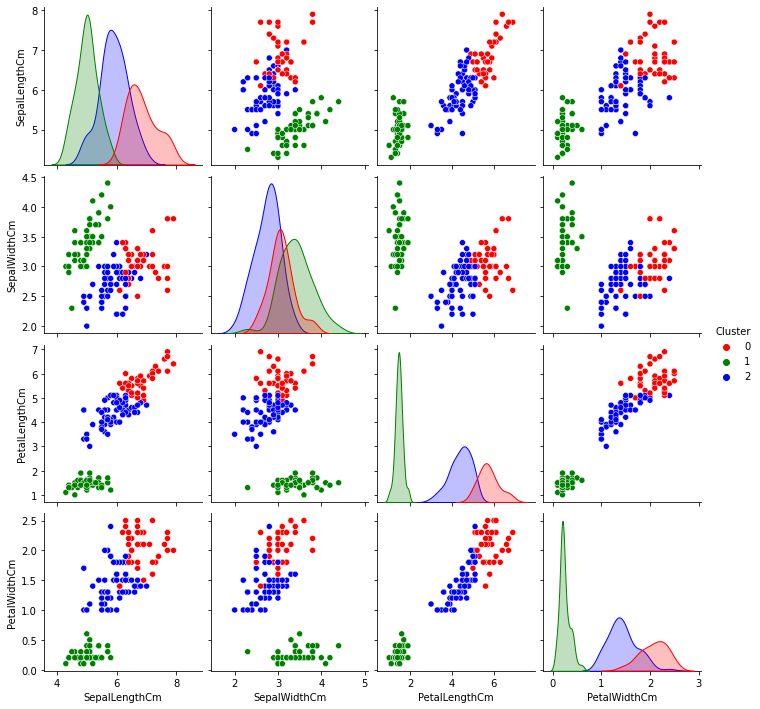

In [ ]:
#representing clusters all combinations of the the columns taking two at a time
sns.pairplot(data=df,vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm'], hue='Cluster',palette=['r','g','b'])